In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
file_path = "earthquakes1.csv"
df = pd.read_csv(file_path)

In [5]:
df.head()

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,EventID
0,1970/01/04 17:00:40.20,24.139,102.503,31.0,7.5,Ms,90.0,NaN,NaN,0.0,NEI,1.970010e+09
1,1970/01/06 05:35:51.80,-9.628,151.458,8.0,6.2,Ms,85.0,NaN,NaN,0.0,NEI,1.970011e+09
2,1970/01/08 17:12:39.10,-34.741,178.568,179.0,6.1,Mb,59.0,NaN,NaN,0.0,NEI,1.970011e+09
3,1970/01/10 12:07:08.60,6.825,126.737,73.0,6.1,Mb,91.0,NaN,NaN,0.0,NEI,1.970011e+09
4,1970/01/16 08:05:39.00,60.280,-152.660,85.0,6.0,ML,0.0,NaN,NaN,NaN,AK,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5304 entries, 0 to 5303
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DateTime    5304 non-null   object 
 1   Latitude    5304 non-null   float64
 2   Longitude   5304 non-null   float64
 3   Depth       5304 non-null   float64
 4   Magnitude   5304 non-null   float64
 5   MagType     5304 non-null   object 
 6   NbStations  5250 non-null   float64
 7   Gap         172 non-null    float64
 8   Distance    170 non-null    float64
 9   RMS         5264 non-null   float64
 10  Source      5304 non-null   object 
 11  EventID     5242 non-null   float64
dtypes: float64(9), object(3)
memory usage: 497.4+ KB


In [7]:
df.shape

(5304, 12)

In [34]:


# Drop columns with excessive missing values
df_cleaned = df.drop(columns=["Gap", "Distance", "EventID"])

# Drop rows with missing values
df_cleaned = df_cleaned.dropna()

# Convert DateTime to datetime object
df_cleaned["DateTime"] = pd.to_datetime(df_cleaned["DateTime"], errors="coerce")

# Extract time-based features
df_cleaned["Year"] = df_cleaned["DateTime"].dt.year
df_cleaned["Month"] = df_cleaned["DateTime"].dt.month
df_cleaned["Day"] = df_cleaned["DateTime"].dt.day

df_cleaned = df_cleaned.drop(columns=["DateTime"])

# Convert categorical columns to numerical
df_cleaned = pd.get_dummies(df_cleaned, columns=["MagType", "Source"], drop_first=True)

# Classify magnitude into categories
df_cleaned["Magnitude_Class"] = pd.cut(df_cleaned["Magnitude"], bins=[0, 5, 7, 10], labels=[0, 1, 2])
df_cleaned = df_cleaned.drop(columns=["Magnitude"])

# Define features and target variable
X = df_cleaned.drop(columns=["Magnitude_Class"])
y = df_cleaned["Magnitude_Class"].astype(int)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

# Print results
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-Score: {f1:.2%}")

Accuracy: 92.42%
Precision: 90.60%
Recall: 92.42%
F1-Score: 89.52%



Confusion Matrix - Random Forest:
[[587 146]
 [193 539]]

Confusion Matrix - Logistic Regression:
[[404 329]
 [275 457]]

Confusion Matrix - SVM:
[[477 256]
 [196 536]]

Confusion Matrix - KNN:
[[563 170]
 [266 466]]

Confusion Matrix - Decision Tree:
[[520 213]
 [266 466]]


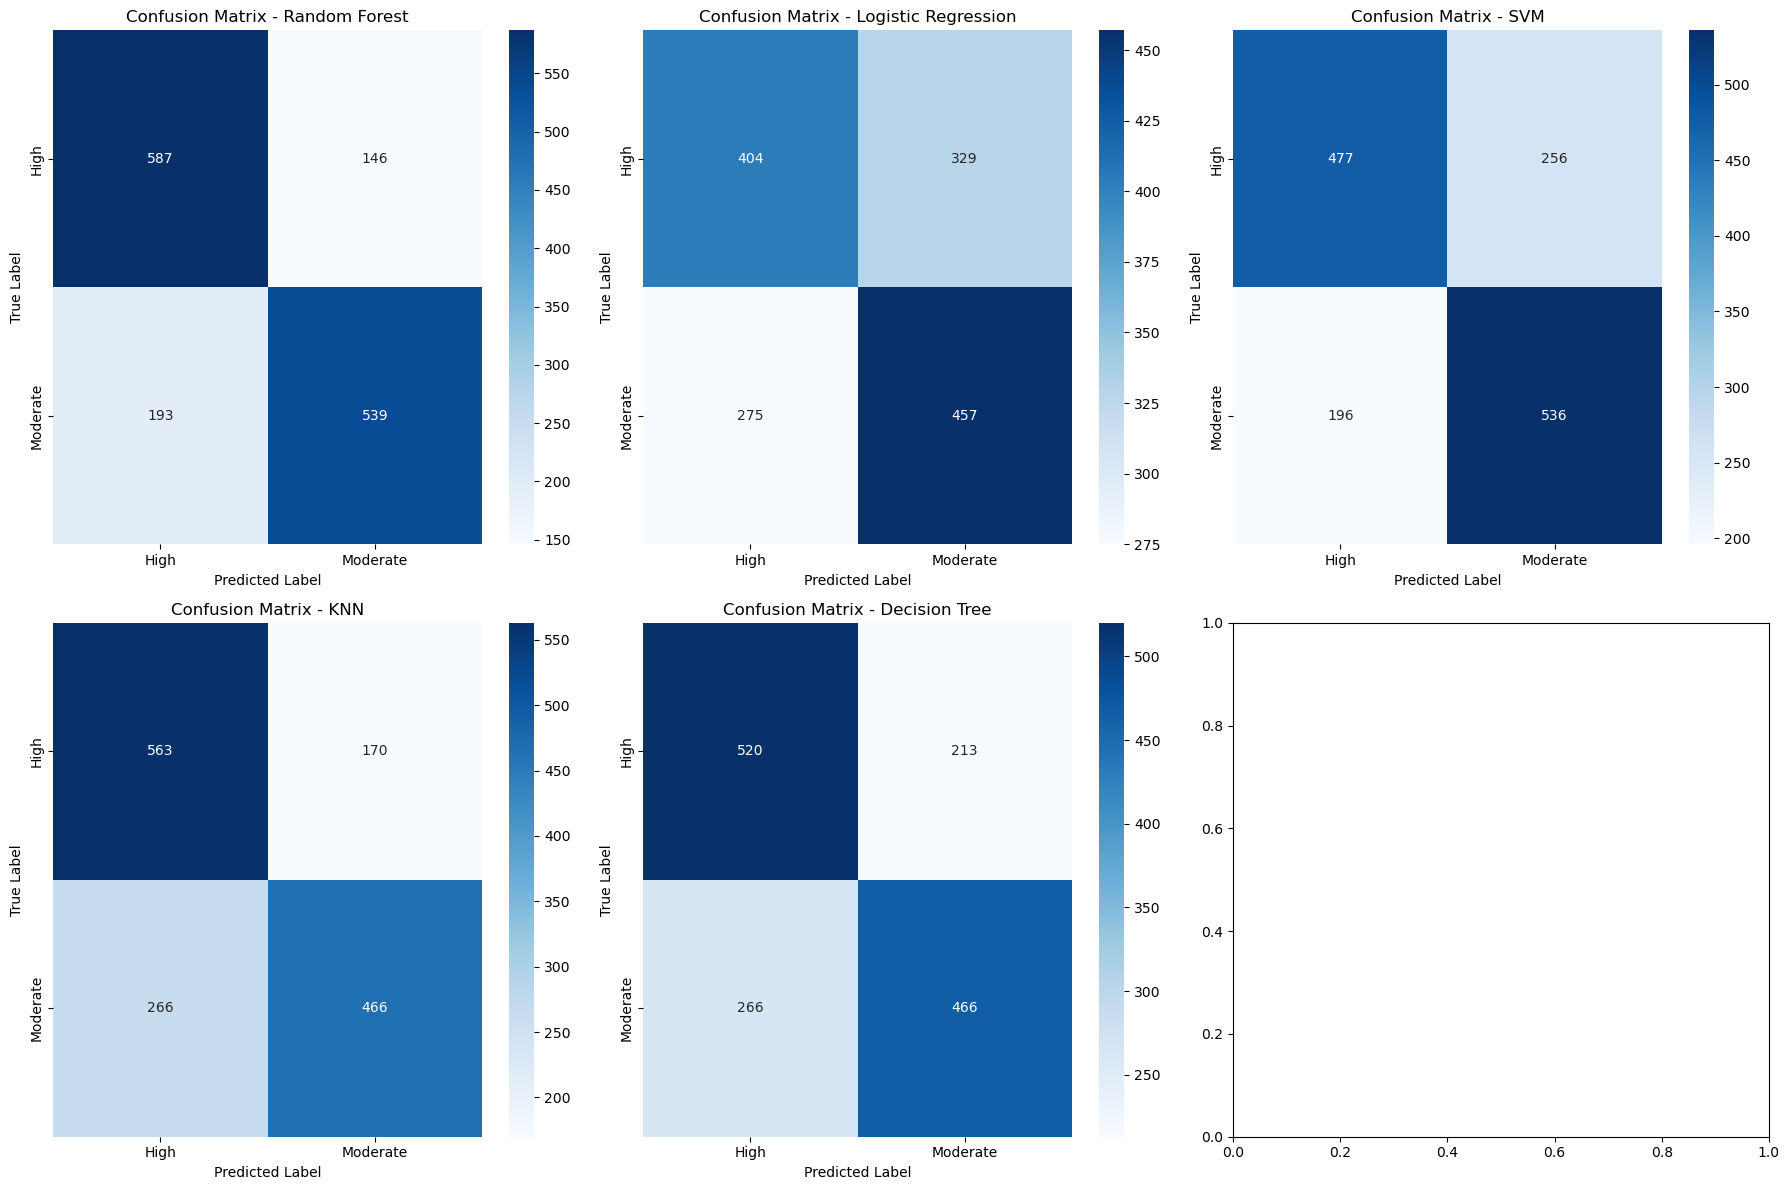

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print numerical confusion matrices
for name, cm in conf_matrices.items():
    print(f"\nConfusion Matrix - {name}:")
    print(cm)

# Plot confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i], 
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    axes[i].set_title(f"Confusion Matrix - {name}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()



Confusion Matrix - Random Forest:
[[587 146]
 [193 539]]

Confusion Matrix - Logistic Regression:
[[404 329]
 [275 457]]

Confusion Matrix - SVM:
[[477 256]
 [196 536]]

Confusion Matrix - KNN:
[[563 170]
 [266 466]]

Confusion Matrix - Decision Tree:
[[520 213]
 [266 466]]

Model Performance Metrics:
                     Accuracy  Precision    Recall  F1-score
Random Forest        0.768601   0.769701  0.768601  0.768357
Logistic Regression  0.587713   0.588213  0.587713  0.587163
SVM                  0.691468   0.692778  0.691468  0.690958
KNN                  0.702389   0.705900  0.702389  0.701092
Decision Tree        0.673038   0.673932  0.673038  0.672601


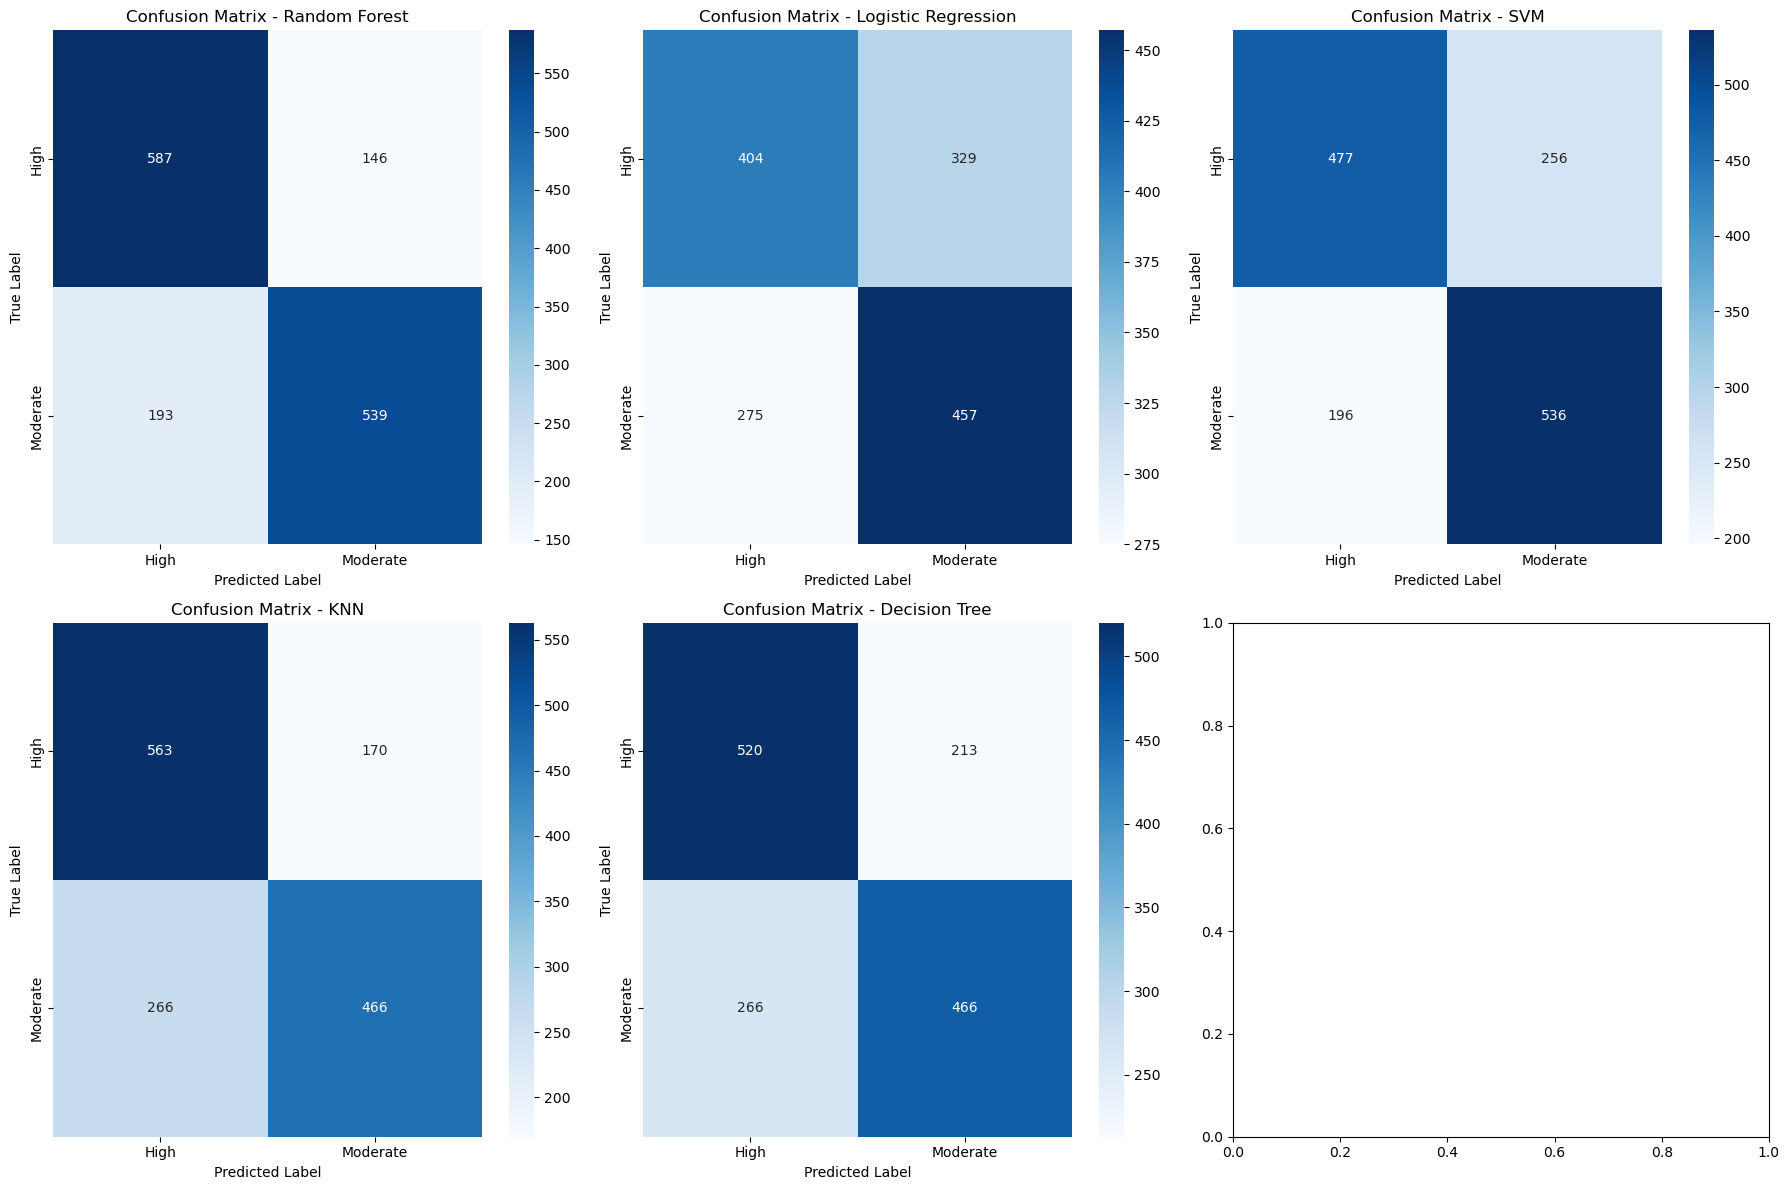

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

# Load dataset
file_path = "earthquakes1.csv"
df = pd.read_csv(file_path)

# Define earthquake severity levels
def categorize_magnitude(mag):
    if mag < 5.0:
        return "Low"
    elif 5.0 <= mag < 6.5:
        return "Moderate"
    else:
        return "High"

# Apply categorization
df["Severity"] = df["Magnitude"].apply(categorize_magnitude)

# Encode labels
label_encoder = LabelEncoder()
df["Severity"] = label_encoder.fit_transform(df["Severity"])  # Encodes Low, Moderate, High to 0, 1, 2

# Select features and target
features = ["Latitude", "Longitude", "Depth", "NbStations", "RMS"]
df_clean = df.dropna(subset=features + ["Severity"])  # Remove rows with missing values
X = df_clean[features]
y = df_clean["Severity"]

# Apply SMOTE for better class balancing
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Scale features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Define models with hyperparameter tuning
models = {
    "Random Forest": RandomForestClassifier(n_estimators=300, max_depth=20, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=2000, C=2.0, solver='liblinear'),
    "SVM": SVC(kernel='rbf', C=3.0, gamma='scale', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    "Decision Tree": DecisionTreeClassifier(max_depth=15, min_samples_split=10, random_state=42)
}

# Train models and generate confusion matrices and classification reports
conf_matrices = {}
classification_metrics = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Store confusion matrix
    conf_matrices[name] = confusion_matrix(y_test, y_pred)
    
    # Store classification metrics
    classification_metrics[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted", zero_division=0),
        "Recall": recall_score(y_test, y_pred, average="weighted", zero_division=0),
        "F1-score": f1_score(y_test, y_pred, average="weighted", zero_division=0)
    }

# Print numerical confusion matrices
for name, cm in conf_matrices.items():
    print(f"\nConfusion Matrix - {name}:")
    print(cm)

# Print model performance metrics
metrics_df = pd.DataFrame.from_dict(classification_metrics, orient='index')
print("\nModel Performance Metrics:")
print(metrics_df.to_string(index=True))

# Plot confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i], 
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    axes[i].set_title(f"Confusion Matrix - {name}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()


In [35]:
import pandas as pd

# Convert classification metrics dictionary to a DataFrame for better readability
metrics_df = pd.DataFrame.from_dict(classification_metrics, orient='index')

# Print the table of results
print("\nModel Performance Metrics:")
print(metrics_df.to_string(index=True))



Model Performance Metrics:
                     Accuracy  Precision    Recall  F1-score
Random Forest        0.768601   0.769701  0.768601  0.768357
Logistic Regression  0.587713   0.588213  0.587713  0.587163
SVM                  0.691468   0.692778  0.691468  0.690958
KNN                  0.702389   0.705900  0.702389  0.701092
Decision Tree        0.673038   0.673932  0.673038  0.672601


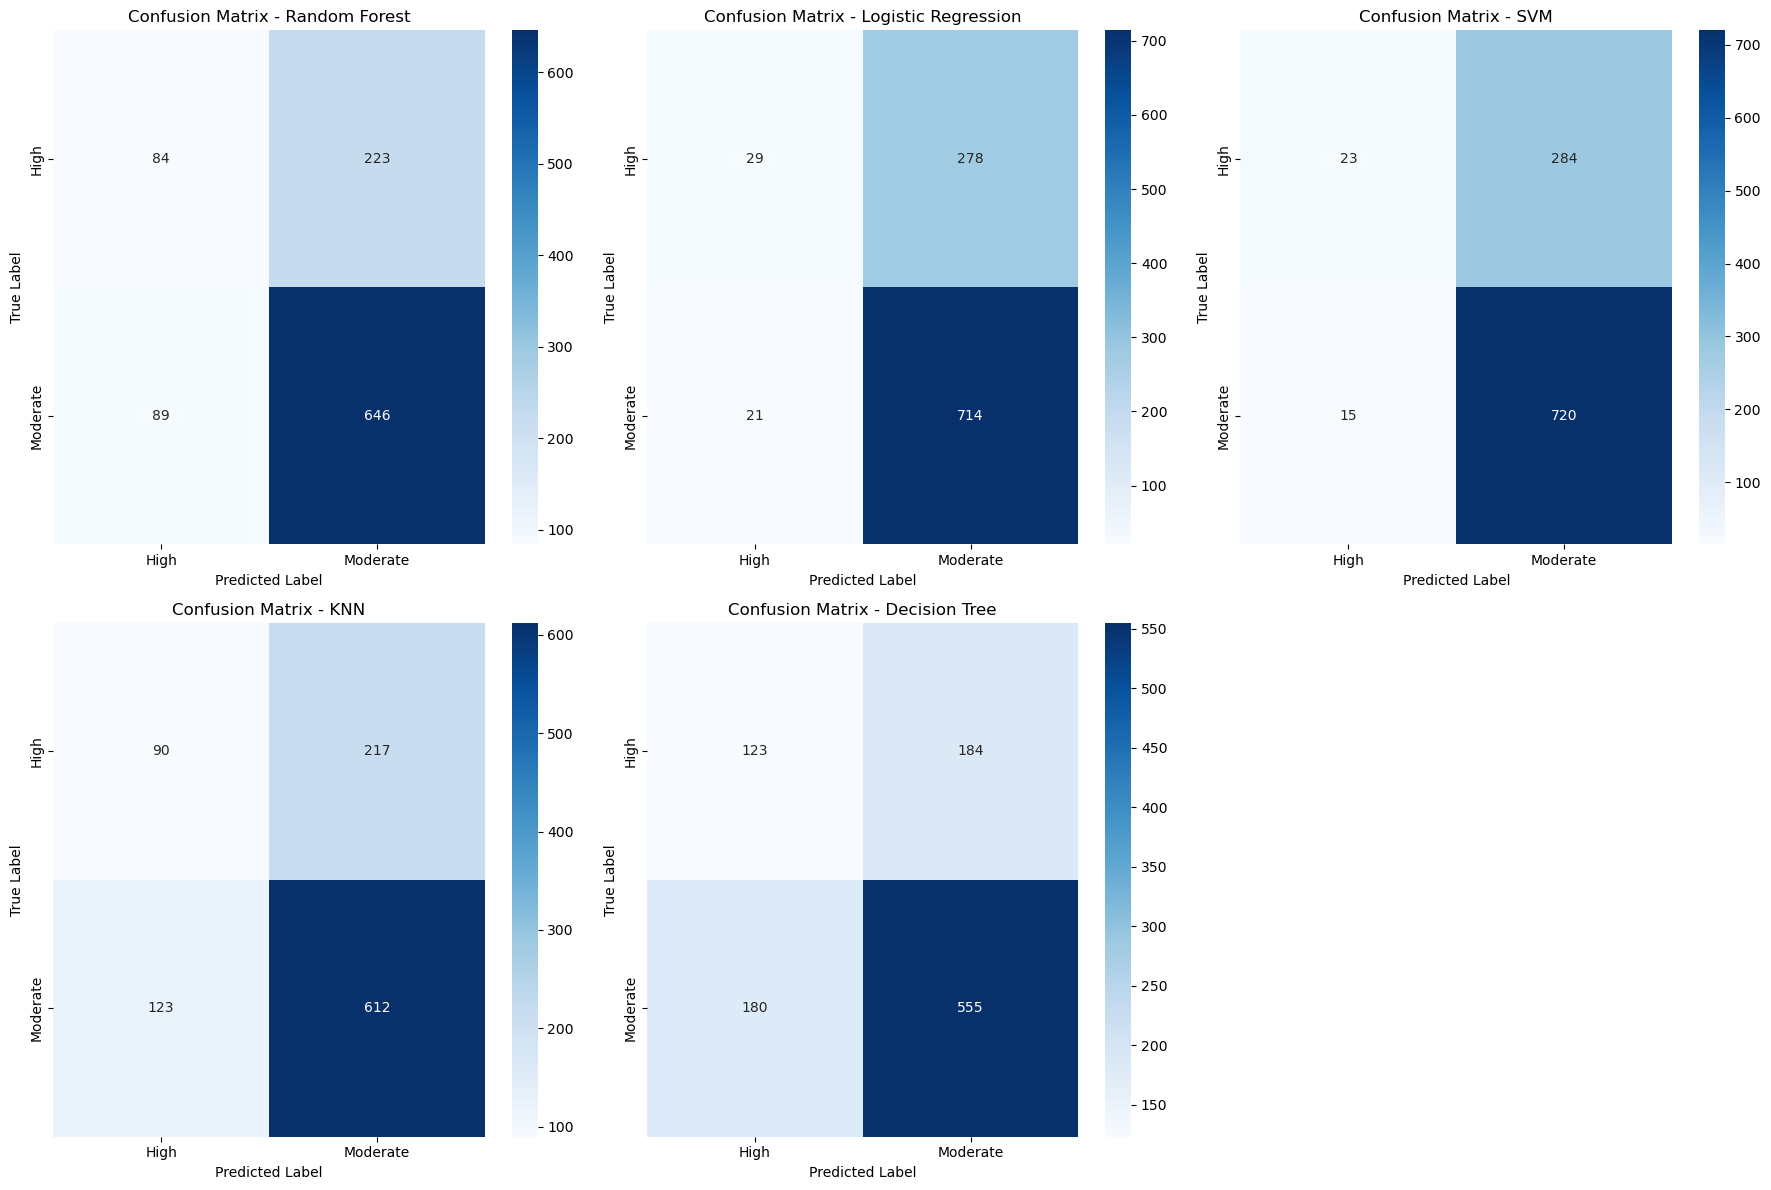

Classification Report for Random Forest:
              precision    recall  f1-score   support

        High       0.48      0.30      0.37       307
    Moderate       0.75      0.87      0.80       735

    accuracy                           0.70      1042
   macro avg       0.62      0.58      0.59      1042
weighted avg       0.67      0.70      0.67      1042

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

        High       0.58      0.09      0.16       307
    Moderate       0.72      0.97      0.83       735

    accuracy                           0.71      1042
   macro avg       0.65      0.53      0.49      1042
weighted avg       0.68      0.71      0.63      1042

Classification Report for SVM:
              precision    recall  f1-score   support

        High       0.61      0.07      0.13       307
    Moderate       0.72      0.98      0.83       735

    accuracy                           0.71      1042
   macro 

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Load dataset
file_path = "earthquakes1.csv"
df = pd.read_csv(file_path)

# Define earthquake severity levels
def categorize_magnitude(mag):
    if mag < 5.0:
        return "Low"
    elif 5.0 <= mag < 6.5:
        return "Moderate"
    else:
        return "High"

# Apply categorization
df["Severity"] = df["Magnitude"].apply(categorize_magnitude)

# Encode labels
label_encoder = LabelEncoder()
df["Severity"] = label_encoder.fit_transform(df["Severity"])

# Select features and target
features = ["Latitude", "Longitude", "Depth", "NbStations", "RMS"]
df_clean = df.dropna(subset=features + ["Severity"])  # Remove rows with missing values
X = df_clean[features]
y = df_clean["Severity"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Train models and generate confusion matrices
conf_matrices = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

# Plot confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Creates 6 subplots
axes = axes.flatten()

for i, (name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i], 
                xticklabels=label_encoder.classes_, 
                yticklabels=label_encoder.classes_)
    axes[i].set_title(f"Confusion Matrix - {name}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

# Hide the unused last subplot
if len(conf_matrices) < len(axes):
    for j in range(len(conf_matrices), len(axes)):
        fig.delaxes(axes[j])  # Remove the extra subplot

plt.tight_layout()
plt.show()

# Print classification reports
for name, report in classification_reports.items():
    print(f"Classification Report for {name}:")
    print(report)
    print("="*60)



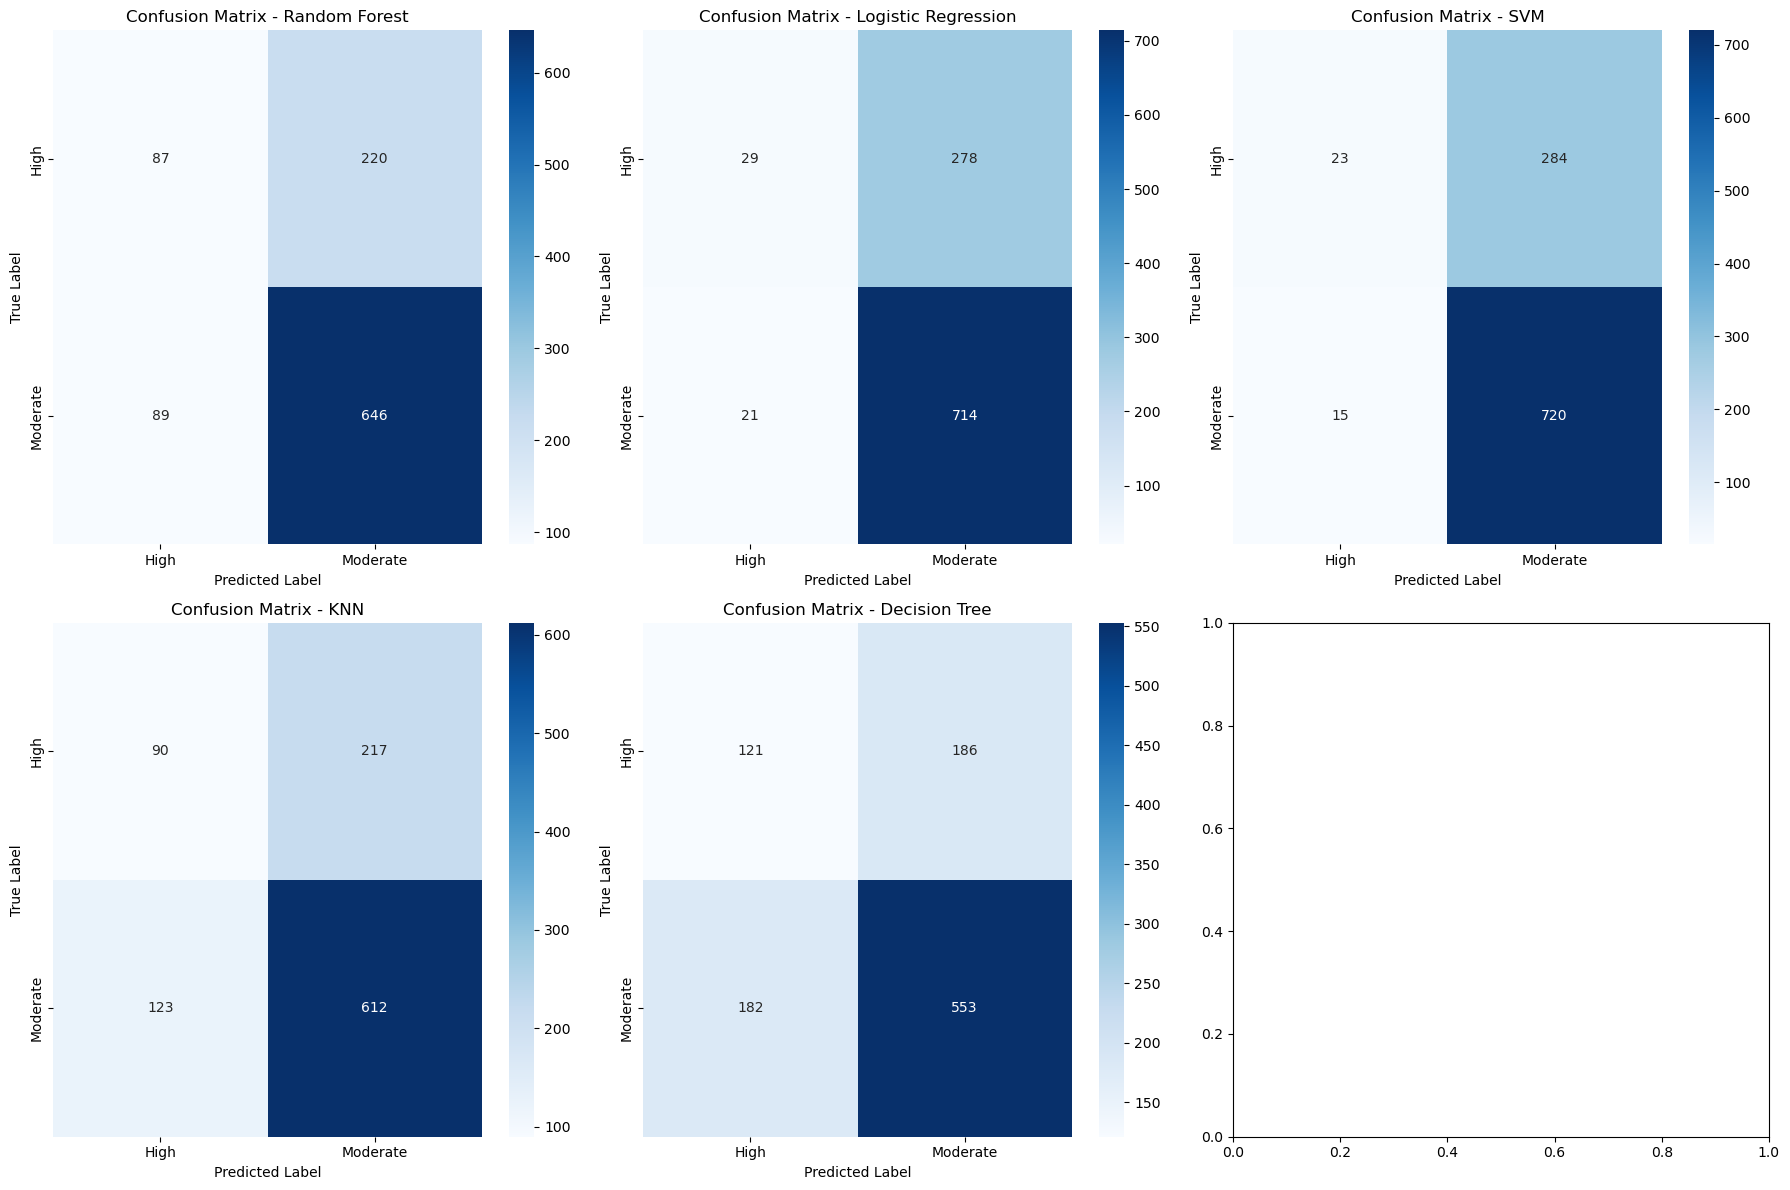


Model Performance Metrics:
                     Accuracy  Precision    Recall  F1-score
Random Forest        0.703455   0.671819  0.703455  0.675372
Logistic Regression  0.713052   0.678582  0.713052  0.631117
SVM                  0.713052   0.684172  0.713052  0.623377
KNN                  0.673704   0.645224  0.673704  0.654018
Decision Tree        0.646833   0.645493  0.646833  0.646154


In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Load dataset
file_path = "earthquakes1.csv"
df = pd.read_csv(file_path)

# Define earthquake severity levels
def categorize_magnitude(mag):
    if mag < 5.0:
        return "Low"
    elif 5.0 <= mag < 6.5:
        return "Moderate"
    else:
        return "High"

# Apply categorization
df["Severity"] = df["Magnitude"].apply(categorize_magnitude)

# Encode labels
label_encoder = LabelEncoder()
df["Severity"] = label_encoder.fit_transform(df["Severity"])

# Select features and target
features = ["Latitude", "Longitude", "Depth", "NbStations", "RMS"]
df_clean = df.dropna(subset=features + ["Severity"])  # Remove rows with missing values
X = df_clean[features]
y = df_clean["Severity"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Train models and generate confusion matrices and classification reports
conf_matrices = {}
classification_metrics = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    conf_matrices[name] = confusion_matrix(y_test, y_pred)
    classification_metrics[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted", zero_division=0),
        "Recall": recall_score(y_test, y_pred, average="weighted", zero_division=0),
        "F1-score": f1_score(y_test, y_pred, average="weighted", zero_division=0)
    }

# Plot confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()
for i, (name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i], xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    axes[i].set_title(f"Confusion Matrix - {name}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()

# Print classification metrics in table format
metrics_df = pd.DataFrame.from_dict(classification_metrics, orient='index')
print("\nModel Performance Metrics:")
print(metrics_df.to_string(index=True))


In [49]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

# Load dataset
file_path = "earthquakes1.csv"
df = pd.read_csv(file_path)

# Define updated earthquake severity levels
def categorize_magnitude(mag):
    if mag < 4.0:
        return "Low"
    elif 4.0 <= mag < 5.5:
        return "Moderate"
    else:
        return "High"

# Apply categorization
df["Severity"] = df["Magnitude"].apply(categorize_magnitude)

# Encode labels
label_encoder = LabelEncoder()
df["Severity"] = label_encoder.fit_transform(df["Severity"])  # Encodes: Low = 0, Moderate = 1, High = 2

# Select features and remove missing values
features = ["Latitude", "Longitude", "Depth", "NbStations", "RMS"]
df_clean = df.dropna(subset=features + ["Severity"])  # Remove NaN rows

# Convert features & labels to NumPy arrays
X = df_clean[features].to_numpy()
y = df_clean["Severity"].to_numpy()

# Check class distribution before applying SMOTE
print("Class Distribution Before SMOTE:")
print(pd.Series(y).value_counts())

# Apply SMOTE to balance dataset
smote = SMOTE(sampling_strategy="auto", random_state=42)

try:
    X_resampled, y_resampled = smote.fit_resample(X, y)
    print("SMOTE applied successfully!")
except ValueError as e:
    print("SMOTE Error:", e)
    print("Possible cause: Not enough samples for each class.")

# Check class distribution after SMOTE
print("Class Distribution After SMOTE:")
print(pd.Series(y_resampled).value_counts())


Class Distribution Before SMOTE:
0    5210
Name: count, dtype: int64
SMOTE Error: The target 'y' needs to have more than 1 class. Got 1 class instead
Possible cause: Not enough samples for each class.
Class Distribution After SMOTE:
Severity
0    3689
1    3689
Name: count, dtype: int64


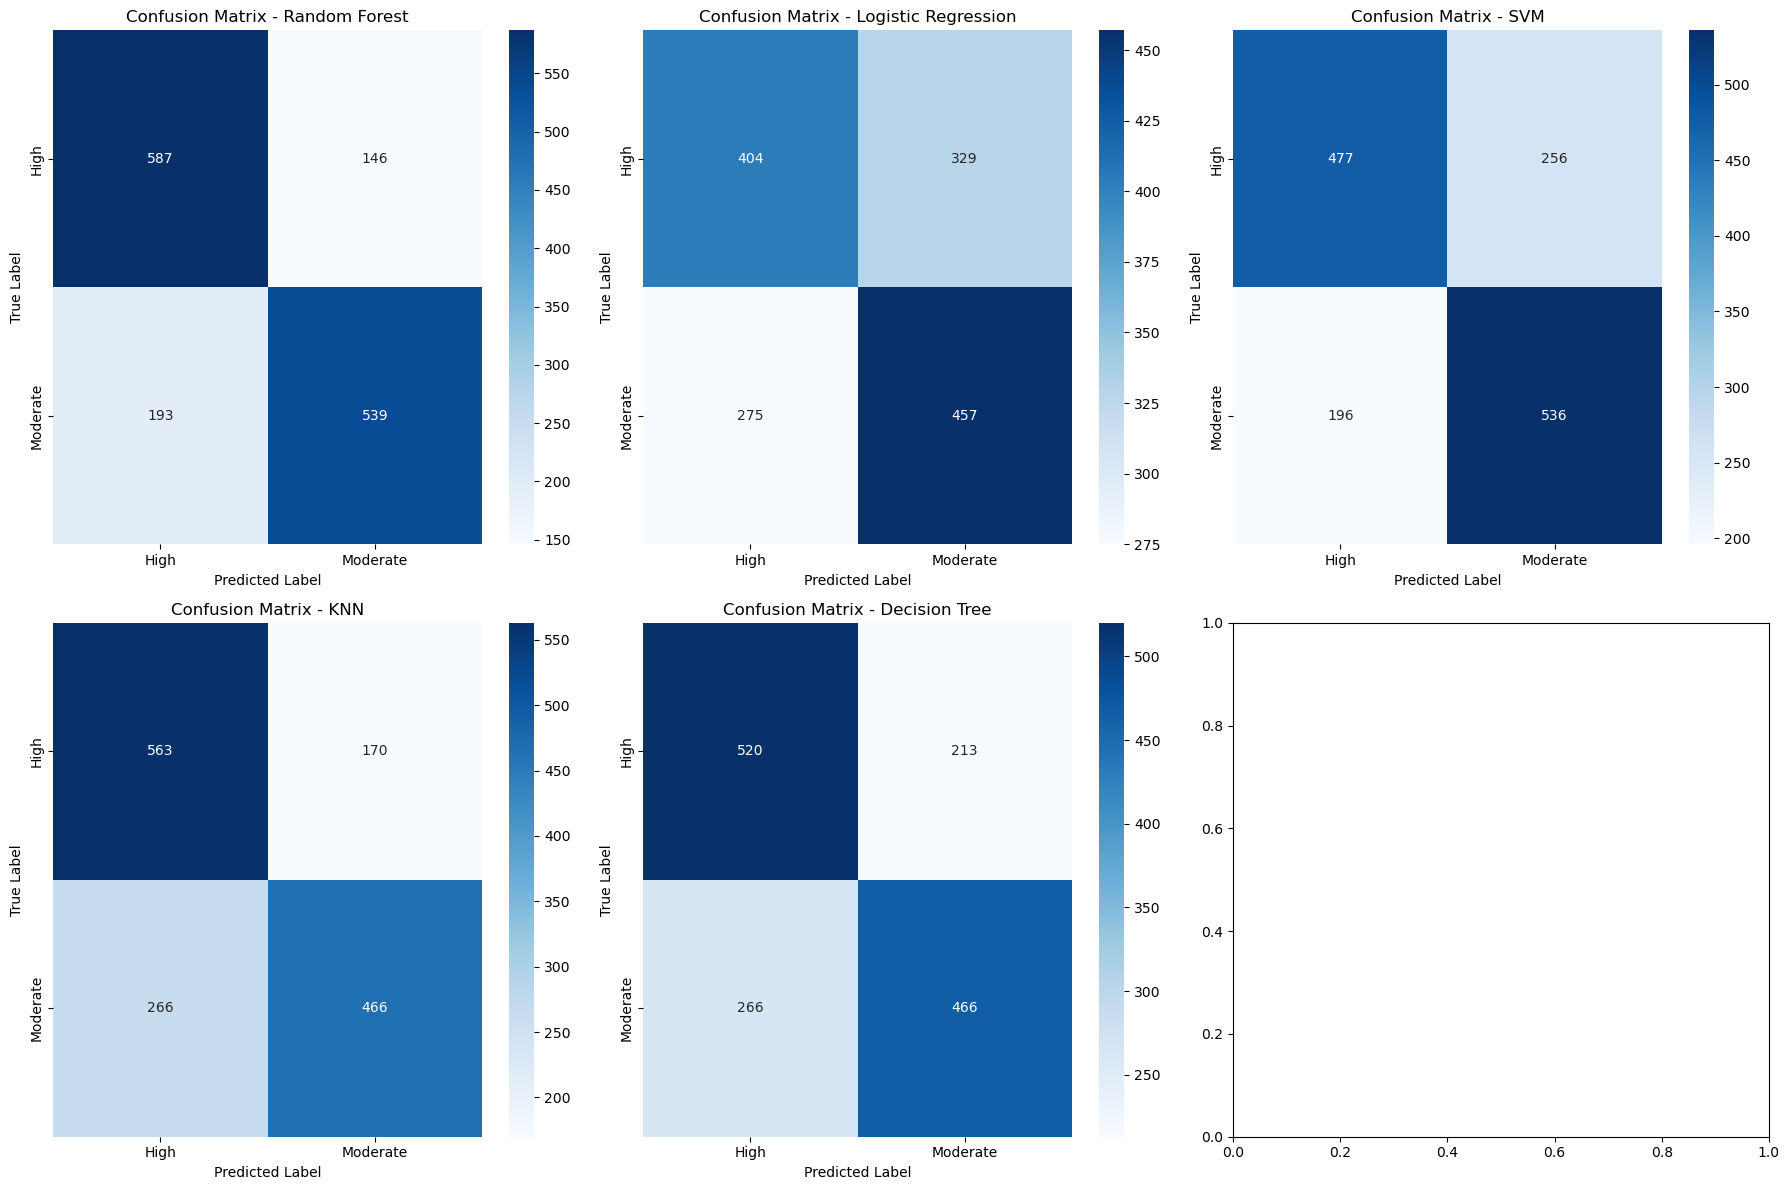


Model Performance Metrics:
                     Accuracy  Precision    Recall  F1-score
Random Forest        0.768601   0.769701  0.768601  0.768357
Logistic Regression  0.587713   0.588213  0.587713  0.587163
SVM                  0.691468   0.692778  0.691468  0.690958
KNN                  0.702389   0.705900  0.702389  0.701092
Decision Tree        0.673038   0.673932  0.673038  0.672601


In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

# Load dataset
file_path = "earthquakes1.csv"
df = pd.read_csv(file_path)

# Define earthquake severity levels
def categorize_magnitude(mag):
    if mag < 5.0:
        return "Low"
    elif 5.0 <= mag < 6.5:
        return "Moderate"
    else:
        return "High"

# Apply categorization
df["Severity"] = df["Magnitude"].apply(categorize_magnitude)

# Encode labels
label_encoder = LabelEncoder()
df["Severity"] = label_encoder.fit_transform(df["Severity"])

# Select features and target
features = ["Latitude", "Longitude", "Depth", "NbStations", "RMS"]
df_clean = df.dropna(subset=features + ["Severity"])  # Remove rows with missing values
X = df_clean[features]
y = df_clean["Severity"]

# Apply SMOTE for better class balancing
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Scale features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Define models with hyperparameter tuning
models = {
    "Random Forest": RandomForestClassifier(n_estimators=300, max_depth=20, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=2000, C=2.0, solver='liblinear'),
    "SVM": SVC(kernel='rbf', C=3.0, gamma='scale', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    "Decision Tree": DecisionTreeClassifier(max_depth=15, min_samples_split=10, random_state=42)
}

# Train models and generate confusion matrices and classification reports
conf_matrices = {}
classification_metrics = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    conf_matrices[name] = confusion_matrix(y_test, y_pred)
    classification_metrics[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted", zero_division=0),
        "Recall": recall_score(y_test, y_pred, average="weighted", zero_division=0),
        "F1-score": f1_score(y_test, y_pred, average="weighted", zero_division=0)
    }

# Plot confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()
for i, (name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i], xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    axes[i].set_title(f"Confusion Matrix - {name}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()

# Print classification metrics in table format
metrics_df = pd.DataFrame.from_dict(classification_metrics, orient='index')
print("\nModel Performance Metrics:")
print(metrics_df.to_string(index=True))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# Load the dataset
file_path = "updated_earthquakes.csv"
df = pd.read_csv(file_path)

# Convert DateTime to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

# Extract useful time-based features
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute

# Drop unnecessary columns
df.drop(columns=['DateTime', 'Gap', 'Distance'], inplace=True, errors='ignore')

# Handle missing values by filling with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode categorical features
label_enc = LabelEncoder()
df['MagType'] = label_enc.fit_transform(df['MagType'].astype(str))
df['Source'] = label_enc.fit_transform(df['Source'].astype(str))

# Define magnitude categories
def categorize_magnitude(mag):
    if mag < 5.0:
        return "Low"
    elif 5.0 <= mag < 7.0:
        return "Moderate"
    else:
        return "High"

df['MagnitudeClass'] = df['Magnitude'].apply(categorize_magnitude)
df.drop(columns=['Magnitude'], inplace=True)

# Encode target variable
df['MagnitudeClass'] = label_enc.fit_transform(df['MagnitudeClass'])

# Define features and target variable
X = df.drop(columns=['MagnitudeClass'])  # Features
y = df['MagnitudeClass']  # Target variable

# Use Stratified Shuffle Split to maintain class balance
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning for RandomForest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Train the best model
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
#roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')

print("Optimized Model Training Completed.")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
#print(f"ROC AUC Score: {roc_auc}")


Random Forest Results:
Accuracy: 92.03%
Precision: 84.87%
Recall: 92.03%
F1-Score: 88.31%



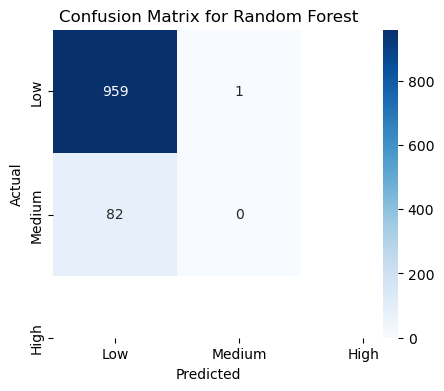

c:\Users\Niraj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Results:
Accuracy: 91.84%
Precision: 84.86%
Recall: 91.84%
F1-Score: 88.21%



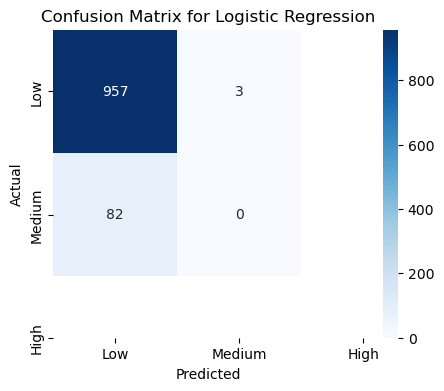

c:\Users\Niraj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Results:
Accuracy: 92.13%
Precision: 84.88%
Recall: 92.13%
F1-Score: 88.36%



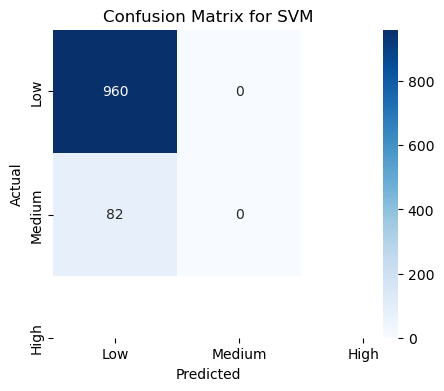

KNN Results:
Accuracy: 91.84%
Precision: 88.26%
Recall: 91.84%
F1-Score: 89.02%



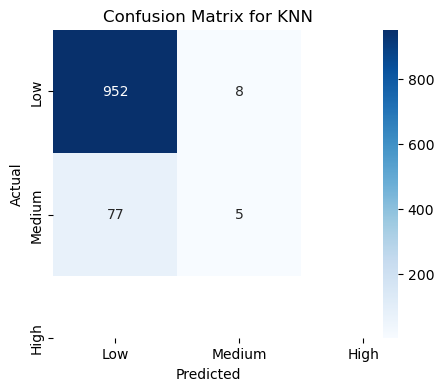

Decision Tree Results:
Accuracy: 86.95%
Precision: 87.78%
Recall: 86.95%
F1-Score: 87.35%



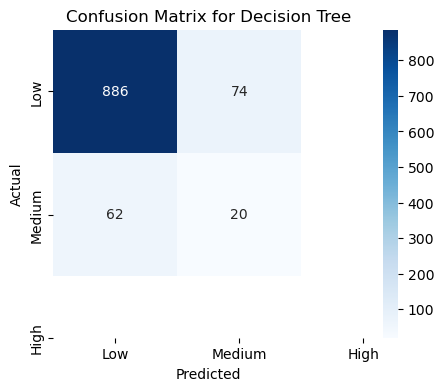

Naive Bayes Results:
Accuracy: 24.95%
Precision: 91.35%
Recall: 24.95%
F1-Score: 30.48%



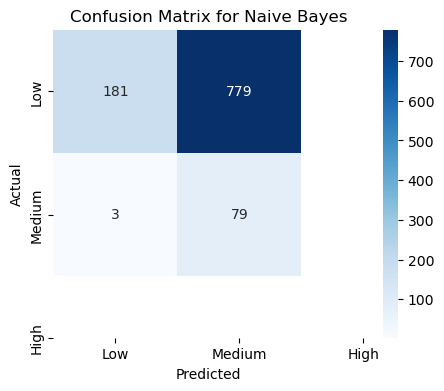

Skipping ROC curve for Naive Bayes due to shape mismatch.


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Load dataset
file_path = "earthquakes1.csv"
df = pd.read_csv(file_path)

# Drop columns with excessive missing values
df_cleaned = df.drop(columns=["Gap", "Distance", "EventID"])

# Drop rows with missing values
df_cleaned = df_cleaned.dropna()

# Convert DateTime to datetime object
df_cleaned["DateTime"] = pd.to_datetime(df_cleaned["DateTime"], errors="coerce")

# Extract time-based features
df_cleaned["Year"] = df_cleaned["DateTime"].dt.year
df_cleaned["Month"] = df_cleaned["DateTime"].dt.month
df_cleaned["Day"] = df_cleaned["DateTime"].dt.day

df_cleaned = df_cleaned.drop(columns=["DateTime"])

# Convert categorical columns to numerical
df_cleaned = pd.get_dummies(df_cleaned, columns=["MagType", "Source"], drop_first=True)

# Classify magnitude into categories
df_cleaned["Magnitude_Class"] = pd.cut(df_cleaned["Magnitude"], bins=[0, 5, 7, 10], labels=[0, 1, 2])
df_cleaned = df_cleaned.drop(columns=["Magnitude"])

# Define features and target variable
X = df_cleaned.drop(columns=["Magnitude_Class"])
y = df_cleaned["Magnitude_Class"].astype(int)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.2%}")
    print(f"Precision: {precision:.2%}")
    print(f"Recall: {recall:.2%}")
    print(f"F1-Score: {f1:.2%}\n")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()
    
    # ROC Curve
    # ROC Curve
if hasattr(model, "predict_proba"):  # Ensure the model supports probability predictions
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
    y_pred_prob = model.predict_proba(X_test)

    # Ensure y_test_bin has the same number of classes as y_pred_prob
    if y_test_bin.shape[1] == y_pred_prob.shape[1]:
        plt.figure()
        for i in range(y_test_bin.shape[1]):  # Iterate over each class
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'Class {i} (area = {roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {name}')
        plt.legend(loc='lower right')
        plt.show()
    else:
        print(f"Skipping ROC curve for {name} due to shape mismatch.")


    

Random Forest Results:
Accuracy: 77.06%
Precision: 70.81%
Recall: 77.06%
F1-Score: 71.14%



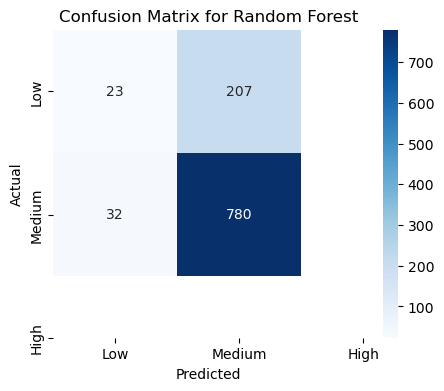

[[ 23 207]
 [ 32 780]]
Skipping ROC curve for Random Forest: Not all classes present in y_test.



c:\Users\Niraj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Results:
Accuracy: 77.16%
Precision: 69.78%
Recall: 77.16%
F1-Score: 70.05%



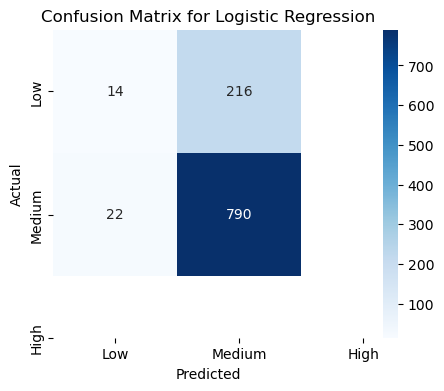

[[ 14 216]
 [ 22 790]]
Skipping ROC curve for Logistic Regression: Not all classes present in y_test.



c:\Users\Niraj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Results:
Accuracy: 77.93%
Precision: 60.73%
Recall: 77.93%
F1-Score: 68.26%



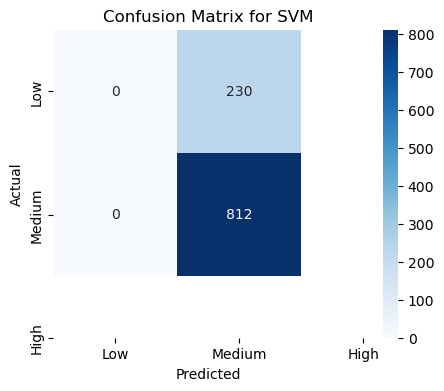

[[  0 230]
 [  0 812]]
Skipping ROC curve for SVM: Not all classes present in y_test.

KNN Results:
Accuracy: 75.05%
Precision: 68.51%
Recall: 75.05%
F1-Score: 70.28%



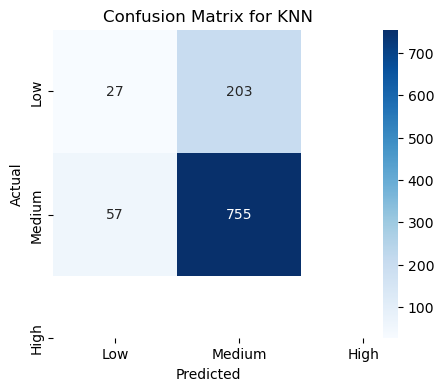

[[ 27 203]
 [ 57 755]]
Skipping ROC curve for KNN: Not all classes present in y_test.

Decision Tree Results:
Accuracy: 68.04%
Precision: 69.26%
Recall: 68.04%
F1-Score: 68.62%



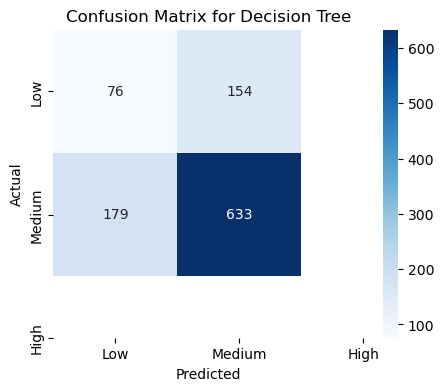

[[ 76 154]
 [179 633]]
Skipping ROC curve for Decision Tree: Not all classes present in y_test.

Naive Bayes Results:
Accuracy: 22.36%
Precision: 54.43%
Recall: 22.36%
F1-Score: 9.24%



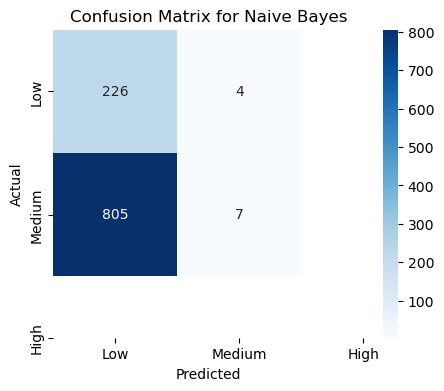

[[226   4]
 [805   7]]
Skipping ROC curve for Naive Bayes: Not all classes present in y_test.



In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Load dataset
file_path = "earthquakes1.csv"
df = pd.read_csv(file_path)

# Drop columns with excessive missing values
df_cleaned = df.drop(columns=["Gap", "Distance", "EventID"])

# Drop rows with missing values
df_cleaned = df_cleaned.dropna()

# Convert DateTime to datetime object
df_cleaned["DateTime"] = pd.to_datetime(df_cleaned["DateTime"], errors="coerce")

# Extract time-based features
df_cleaned["Year"] = df_cleaned["DateTime"].dt.year
df_cleaned["Month"] = df_cleaned["DateTime"].dt.month
df_cleaned["Day"] = df_cleaned["DateTime"].dt.day

df_cleaned = df_cleaned.drop(columns=["DateTime"])

# Convert categorical columns to numerical
df_cleaned = pd.get_dummies(df_cleaned, columns=["MagType", "Source"], drop_first=True)

# Classify magnitude into categories
df_cleaned["Magnitude_Class"] = pd.cut(df_cleaned["Magnitude"], bins=[0, 4, 6, 10], labels=[0, 1, 2])
df_cleaned = df_cleaned.drop(columns=["Magnitude"])

# Define features and target variable
X = df_cleaned.drop(columns=["Magnitude_Class"])
y = df_cleaned["Magnitude_Class"].astype(int)

# Split dataset into training and testing sets
X_train, X_test, y_train, stratify=y = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.2%}")
    print(f"Precision: {precision:.2%}")
    print(f"Recall: {recall:.2%}")
    print(f"F1-Score: {f1:.2%}\n")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()
    print(cm)
    
    # ROC Curve
    if hasattr(model, "predict_proba") and callable(getattr(model, "predict_proba", None)):
        y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

    # ✅ Ensure all classes exist in y_test before plotting
    
    if len(np.unique(y_test)) == 3:
        y_pred_prob = model.predict_proba(X_test)
        plt.figure()

        for i in range(3):  # 3 Classes: [0, 1, 2]
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {name}')
        plt.legend(loc='lower right')
        plt.show()

    else:
        print(f"Skipping ROC curve for {name}: Not all classes present in y_test.\n")



Random Forest Results:
Accuracy: 92.03%
Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00         0
      Medium       0.92      1.00      0.96       960
        High       0.00      0.00      0.00        82

   micro avg       0.92      0.92      0.92      1042
   macro avg       0.64      0.67      0.65      1042
weighted avg       0.85      0.92      0.88      1042



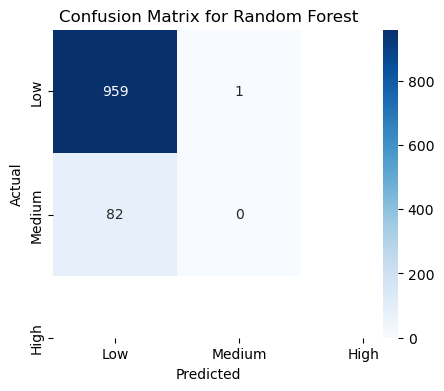

Skipping ROC curve for Random Forest due to shape mismatch.


c:\Users\Niraj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Results:
Accuracy: 91.84%
Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00         0
      Medium       0.92      1.00      0.96       960
        High       0.00      0.00      0.00        82

   micro avg       0.92      0.92      0.92      1042
   macro avg       0.64      0.67      0.65      1042
weighted avg       0.85      0.92      0.88      1042



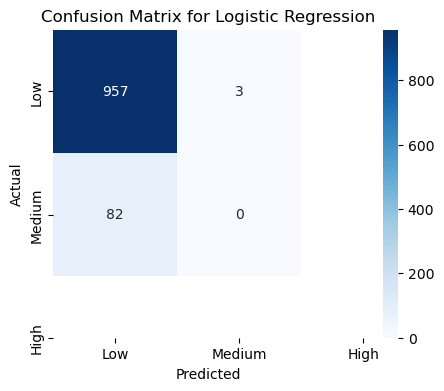

Skipping ROC curve for Logistic Regression due to shape mismatch.


c:\Users\Niraj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Results:
Accuracy: 92.13%
Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00         0
      Medium       0.92      1.00      0.96       960
        High       1.00      0.00      0.00        82

   micro avg       0.92      0.92      0.92      1042
   macro avg       0.97      0.67      0.65      1042
weighted avg       0.93      0.92      0.88      1042



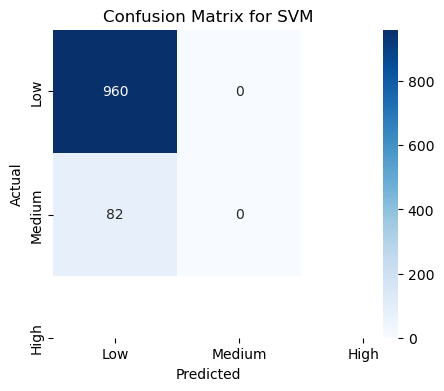

Skipping ROC curve for SVM due to shape mismatch.
KNN Results:
Accuracy: 91.84%
Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00         0
      Medium       0.93      0.99      0.96       960
        High       0.38      0.06      0.11        82

   micro avg       0.92      0.92      0.92      1042
   macro avg       0.77      0.68      0.69      1042
weighted avg       0.88      0.92      0.89      1042



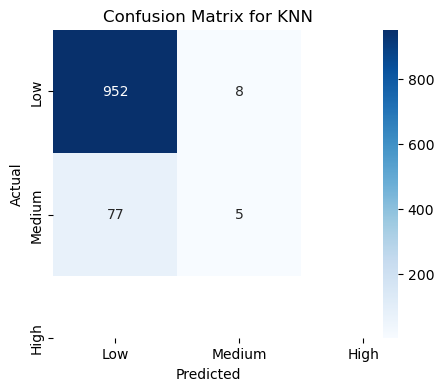

Skipping ROC curve for KNN due to shape mismatch.
Decision Tree Results:
Accuracy: 86.95%
Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00         0
      Medium       0.93      0.92      0.93       960
        High       0.21      0.24      0.23        82

   micro avg       0.87      0.87      0.87      1042
   macro avg       0.72      0.72      0.72      1042
weighted avg       0.88      0.87      0.87      1042



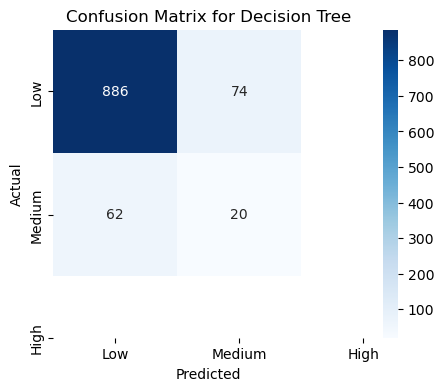

Skipping ROC curve for Decision Tree due to shape mismatch.
Naive Bayes Results:
Accuracy: 24.95%
Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00         0
      Medium       0.98      0.19      0.32       960
        High       0.09      0.96      0.17        82

   micro avg       0.25      0.25      0.25      1042
   macro avg       0.69      0.72      0.49      1042
weighted avg       0.91      0.25      0.30      1042



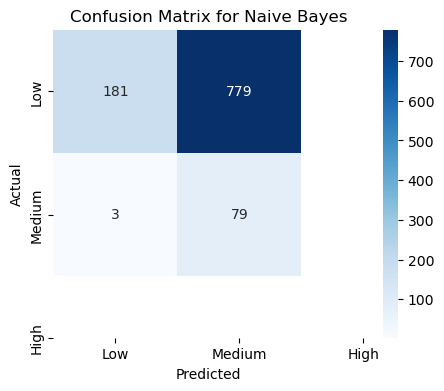

Skipping ROC curve for Naive Bayes due to shape mismatch.

Model Performance Summary:
              Model  Accuracy  Precision   Recall  F1-Score
      Random Forest  0.920345   0.848734 0.920345  0.883090
Logistic Regression  0.918426   0.848594 0.918426  0.882130
                SVM  0.921305   0.848803 0.921305  0.883569
                KNN  0.918426   0.882631 0.918426  0.890217
      Decision Tree  0.869482   0.877795 0.869482  0.873521
        Naive Bayes  0.249520   0.913530 0.249520  0.304759


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.preprocessing import label_binarize
import numpy as np

# Load dataset
file_path = "earthquakes1.csv"
df = pd.read_csv(file_path)

# Drop columns with excessive missing values
df_cleaned = df.drop(columns=["Gap", "Distance", "EventID"])

# Drop rows with missing values
df_cleaned = df_cleaned.dropna()

# Convert DateTime to datetime object
df_cleaned["DateTime"] = pd.to_datetime(df_cleaned["DateTime"], errors="coerce")

# Extract time-based features
df_cleaned["Year"] = df_cleaned["DateTime"].dt.year
df_cleaned["Month"] = df_cleaned["DateTime"].dt.month
df_cleaned["Day"] = df_cleaned["DateTime"].dt.day

df_cleaned = df_cleaned.drop(columns=["DateTime"])

# Convert categorical columns to numerical
df_cleaned = pd.get_dummies(df_cleaned, columns=["MagType", "Source"], drop_first=True)

# Classify magnitude into categories
df_cleaned["Magnitude_Class"] = pd.cut(df_cleaned["Magnitude"], bins=[0, 5, 7, 10], labels=[0, 1, 2])
df_cleaned = df_cleaned.drop(columns=["Magnitude"])

# Define features and target variable
X = df_cleaned.drop(columns=["Magnitude_Class"])
y = df_cleaned["Magnitude_Class"].astype(int)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Store results
results = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    results.append([name, accuracy, precision, recall, f1])
    
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.2%}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, labels=[0, 1, 2], target_names=["Low", "Medium", "High"], zero_division=1))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()
    
    # ROC Curve
    if hasattr(model, "predict_proba"):  # Ensure the model supports probability predictions
        y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
        y_pred_prob = model.predict_proba(X_test)
        if y_test_bin.shape[1] == y_pred_prob.shape[1]:
            plt.figure()
            for i in range(y_test_bin.shape[1]):  # Iterate over each class
                fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
                roc_auc = auc(fpr, tpr)
                plt.plot(fpr, tpr, label=f'Class {i} (area = {roc_auc:.2f})')
            
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve for {name}')
            plt.legend(loc='lower right')
            plt.show()
        else:
            print(f"Skipping ROC curve for {name} due to shape mismatch.")

# Convert results to DataFrame and display as a table
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print("\nModel Performance Summary:")
print(results_df.to_string(index=False))
